In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_columns', 20)

In [2]:
df_day = pd.read_csv('dataset/day.csv')
df_hour = pd.read_csv('dataset/hour.csv')

In [3]:
display(df_day.head(5))
display(df_day.shape)
display(df_day.columns)
display(df_day.isnull().sum())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


(731, 16)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
df_day.season = df_day.season.apply( lambda x: 'Spring' if x == 1
                                        else 'Summer' if x == 2 
                                        else 'Fall'if x==3
                                        else 'Winter')

df_day.weathersit = df_day.weathersit.apply( lambda x: 'Clear' if x == 1
                                            else 'Cloudy' if x == 2 
                                            else 'Light Rain'if x==3
                                            else 'Heavy rain')

df_day.holiday = df_day.holiday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')

df_day.workingday = df_day.workingday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')
df_day.drop('instant', inplace = True, axis = 1)

In [5]:
df_day.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_day.dteday=df_day.dteday.apply(lambda date: pd.to_datetime(date))


In [10]:
df_lw=df_day[(df_day.dteday > pd.to_datetime('2012-12-24') )& (df_day.dteday <= pd.to_datetime('2012-12-31'))]

In [11]:
df_lw

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
724,2012-12-25,Spring,1,12,Yes,2,No,Cloudy,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,2012-12-26,Spring,1,12,No,3,Yes,Light Rain,0.243333,0.220333,0.823333,0.316546,9,432,441
726,2012-12-27,Spring,1,12,No,4,Yes,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,Spring,1,12,No,5,Yes,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,Spring,1,12,No,6,No,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,Spring,1,12,No,0,No,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,Spring,1,12,No,1,Yes,Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729


(array([15699., 15700., 15701., 15702., 15703., 15704., 15705.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

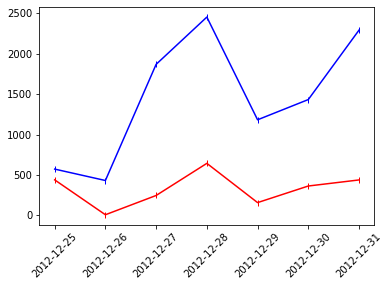

In [18]:
x = df_lw.dteday
y1=df_lw.casual
y2=df_lw.registered
plt.plot(x,y1,'|-r',x,y2,'|-b')
plt.xticks(rotation=45)